In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from google.colab import drive

# HW 2 (Problem 3)
# Sophia Godfrey
# Student ID: 801149485

In [81]:
# Mount Google Drive and load dataset
drive.mount('/content/drive')
filePath = '/content/drive/MyDrive/Colab Notebooks/Housing.csv'
df = pd.read_csv(filePath)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [82]:
# Helper Functions

def add_bias(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

def normalize(X_train, X_val):
    X_min = X_train.min(axis=0)
    X_max = X_train.max(axis=0)
    return (X_train - X_min) / (X_max - X_min), (X_val - X_min) / (X_max - X_min)

def standardize(X_train, X_val):
    mu = X_train.mean(axis=0)
    sigma = X_train.std(axis=0)
    return (X_train - mu) / sigma, (X_val - mu) / sigma

def gradient_descent_reg(X_train, y_train, X_val, y_val, theta, learning_rate, iterations, lmbda):
    m_train = len(y_train)
    m_val = len(y_val)
    train_loss = np.zeros(iterations)
    val_loss = np.zeros(iterations)

    for i in range(iterations):
        errors = X_train.dot(theta) - y_train
        # Update weights with L2 regularization (exclude bias)
        theta[1:] -= (learning_rate / m_train) * (X_train[:,1:].T.dot(errors) + lmbda * theta[1:])
        theta[0] -= (learning_rate / m_train) * np.sum(errors)  # bias term

        # Compute losses
        train_loss[i] = (1/(2*m_train)) * (np.sum(errors**2) + lmbda * np.sum(theta[1:]**2))
        val_loss[i] = (1/(2*m_val)) * np.sum((X_val.dot(theta) - y_val)**2)

    return theta, train_loss, val_loss

In [83]:
# Problem 3a: 5-feature numeric dataset
# Best scaling from Problem 2: Standardized

features_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df[features_a].values
y = df['price'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=8)

# Standardize inputs
X_train_std, X_val_std = standardize(X_train, X_val)
X_train_std = add_bias(X_train_std)
X_val_std = add_bias(X_val_std)

# Training settings
iterations = 1000
learning_rate = 0.1
lmbda_3a = 0.015
theta_init = np.zeros(X_train_std.shape[1])

# Train model
theta_3a, train_loss_3a, val_loss_3a = gradient_descent_reg(
    X_train_std, y_train, X_val_std, y_val, theta_init, learning_rate, iterations, lmbda_3a
)

In [84]:
# Print first 200 iteration losses
print(f"3a - Final Training Loss (first 200 iters): {train_loss_3a[199]:.3e}")
print(f"3a - Final Validation Loss (first 200 iters): {val_loss_3a[199]:.3e}")

3a - Final Training Loss (first 200 iters): 7.399e+11
3a - Final Validation Loss (first 200 iters): 8.747e+11


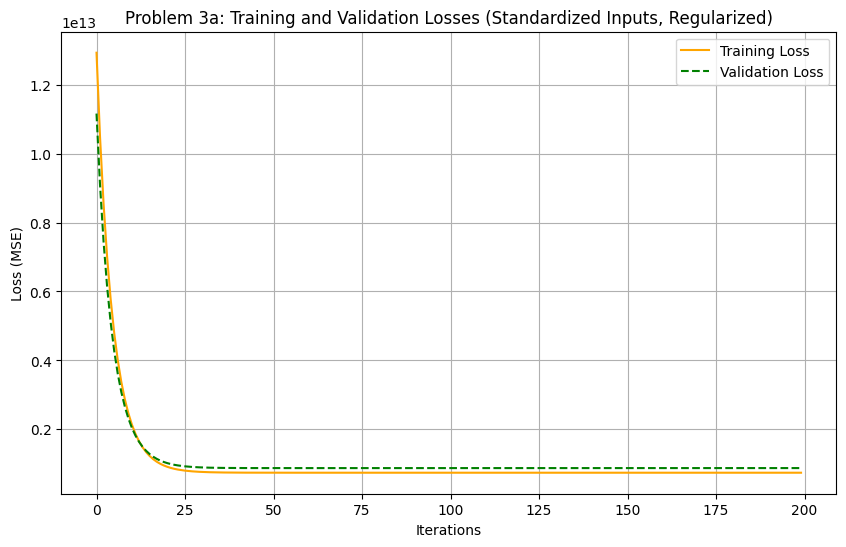

In [85]:
# Plot first 200 iterations
plt.figure(figsize=(10,6))
plt.plot(range(200), train_loss_3a[:200], label='Training Loss', color='orange')
plt.plot(range(200), val_loss_3a[:200], label='Validation Loss', linestyle='--', color='green')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Problem 3a: Training and Validation Losses (Standardized Inputs, Regularized)')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
# Problem 3b: Full feature set including categorical variables
# Best scaling from Problem 2: Standardized

features_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
              'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
              'parking', 'prefarea']

# Convert categorical variables to 0/1
X = df[features_b].applymap(lambda x: 1 if x=="yes" else (0 if x=="no" else x)).values
y = df['price'].values.reshape(-1,1)  # column vector

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=8)

# Standardize inputs
mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0)
X_train_std = (X_train - mu) / sigma
X_val_std = (X_val - mu) / sigma

# Add bias term
X_train_std = np.hstack([np.ones((X_train_std.shape[0],1)), X_train_std])
X_val_std = np.hstack([np.ones((X_val_std.shape[0],1)), X_val_std])

/tmp/ipython-input-3353868242.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = df[features_b].applymap(lambda x: 1 if x=="yes" else (0 if x=="no" else x)).values


In [90]:
# Gradient descent with L2 regularization
def gradient_descent_reg(X_train, y_train, X_val, y_val, theta, alpha, iterations, lmbda):
    m_train = len(y_train)
    m_val = len(y_val)
    train_loss = np.zeros(iterations)
    val_loss = np.zeros(iterations)

    for i in range(iterations):
        errors = X_train.dot(theta) - y_train
        # Update weights with regularization (exclude bias)
        theta[1:] -= (alpha / m_train) * (X_train[:,1:].T.dot(errors) + lmbda * theta[1:])
        theta[0] -= (alpha / m_train) * np.sum(errors)

        # Training loss with regularization
        train_loss[i] = (1/(2*m_train)) * (np.sum(errors**2) + lmbda * np.sum(theta[1:]**2))
        # Validation loss without regularization
        val_loss[i] = (1/(2*m_val)) * np.sum((X_val.dot(theta) - y_val)**2)

    return theta, train_loss, val_loss

In [91]:
# Initialize parameters
theta_init = np.zeros((X_train_std.shape[1],1))
alpha = 0.01
iterations = 1000
lmbda = 0.022  # tuned for standardized inputs

# Train model
theta_3b, train_loss_3b, val_loss_3b = gradient_descent_reg(
    X_train_std, y_train, X_val_std, y_val, theta_init, alpha, iterations, lmbda
)

# Compute percent improvement vs Problem 2b (example: replace with your actual cost from 2b)
cost_2b_std = 8.747e+11  # your final validation loss from Problem 2b
percent_improvement = 100 * -(val_loss_3b[-1] - cost_2b_std) / cost_2b_std

print(f"Final Training Loss (Standardized, Regularized): {train_loss_3b[199]:.3e}")
print(f"Final Validation Loss (Standardized, Regularized): {val_loss_3b[199]:.3e}")
print(f"Percent improvement vs Problem 2b: {percent_improvement:.2f}%")

Final Training Loss (Standardized, Regularized): 7.680e+11
Final Validation Loss (Standardized, Regularized): 7.871e+11
Percent improvement vs Problem 2b: 25.51%


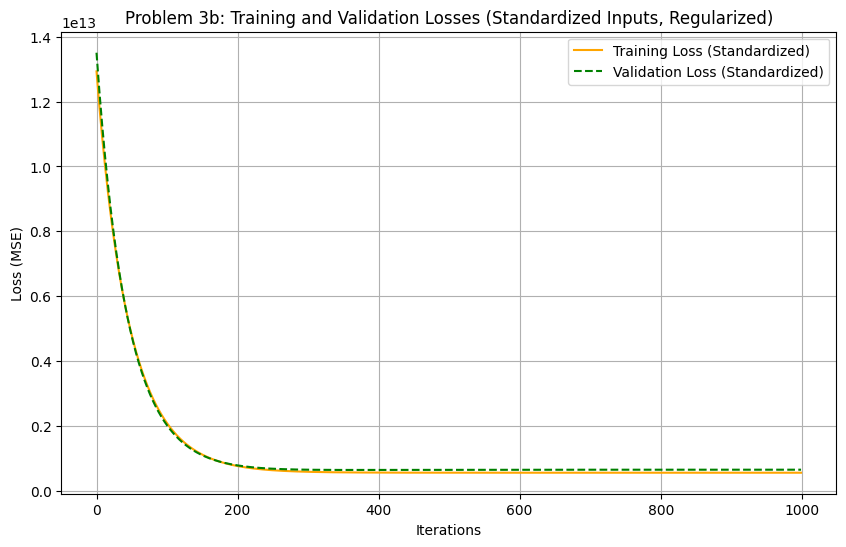

In [94]:
# Plot first 1000 iterations
plt.figure(figsize=(10,6))
plt.plot(range(1000), train_loss_3b[:1000], label='Training Loss (Standardized)', color='orange')
plt.plot(range(1000), val_loss_3b[:1000], label='Validation Loss (Standardized)', linestyle='--', color='green')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Problem 3b: Training and Validation Losses (Standardized Inputs, Regularized)')
plt.legend()
plt.grid(True)
plt.show()